In [2]:
!pip install pycaret
from pycaret.utils import enable_colab
import pandas as pd
enable_colab()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Colab mode enabled.


In [3]:
from pycaret.classification import *

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
dataset= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/baywheels.csv')

In [11]:
dataset

ride_id  rideable_type       started_at         ended_at  \
0       357CDE244D24405B  electric_bike  1/26/2021 11:32  1/26/2021 11:38   
1       19A3E1F4211D0EE8  electric_bike  1/26/2021 14:16  1/26/2021 14:19   
2       27004D90ADC81AFF  electric_bike  1/26/2021 14:02  1/26/2021 14:06   
3       2F81FCA3D9CD056A  electric_bike  1/26/2021 15:03  1/26/2021 15:07   
4       72CC2218DF973489  electric_bike   1/26/2021 9:04   1/26/2021 9:11   
...                  ...            ...              ...              ...   
102358               NaN            NaN              NaN              NaN   
102359               NaN            NaN              NaN              NaN   
102360               NaN            NaN              NaN              NaN   
102361               NaN            NaN              NaN              NaN   
102362               NaN            NaN              NaN              NaN   

        start_station_name  start_station_id  end_station_name  \
0                      NaN               NaN               NaN   
1                      NaN               NaN               NaN   
2                      NaN               NaN               NaN   
3                      NaN               NaN               NaN   
4                      NaN               NaN               NaN   
...                    ...               ...               ...   
102358                 NaN               NaN               NaN   
102359                 NaN               NaN               NaN   
102360                 NaN               NaN               NaN   
102361                 NaN               NaN               NaN   
102362                 NaN               NaN               NaN   

        end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  
0                  NaN      37.76    -122.41    37.76  -122.42        casual  
1                  NaN      37.77    -122.41    37.76  -122.41        casual  
2                  NaN      37.76    -122.42    37.77  -122.41        casual  
3                  NaN      37.76    -122.41    37.76  -122.42        casual  
4                  NaN      37.79    -122.41    37.78  -122.39        casual  
...                ...        ...        ...      ...      ...           ...  
102358             NaN        NaN        NaN      NaN      NaN           NaN  
102359             NaN        NaN        NaN      NaN      NaN           NaN  
102360             NaN        NaN        NaN      NaN      NaN           NaN  
102361             NaN        NaN        NaN      NaN      NaN           NaN  
102362             NaN        NaN        NaN      NaN      NaN           NaN  

[102363 rows x 13 columns]

In [12]:
dataset.shape

(102363, 13)

In [13]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (97245, 13)
Unseen Data For Predictions: (5118, 13)


In [14]:
exp_clf102 = setup(data = data, target = 'member_casual', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'member',use_gpu=True)

Description                 Value
0                               session_id                   123
1                                   Target         member_casual
2                              Target Type                Binary
3                            Label Encoded  casual: 0, member: 1
4                            Original Data           (97245, 13)
5                           Missing Values                  True
6                         Numeric Features                     4
7                     Categorical Features                     6
8                         Ordinal Features                 False
9                High Cardinality Features                 False
10                 High Cardinality Method                  None
11                   Transformed Train Set            (1502, 52)
12                    Transformed Test Set             (696, 52)
13                      Shuffle Train-Test                  True
14                     Stratify Train-Test                 False
15                          Fold Generator       StratifiedKFold
16                             Fold Number                    10
17                                CPU Jobs                    -1
18                                 Use GPU                  True
19                          Log Experiment                  True
20                         Experiment Name                member
21                                     USI                  e271
22                         Imputation Type                simple
23          Iterative Imputation Iteration                  None
24                         Numeric Imputer                  mean
25      Iterative Imputation Numeric Model                  None
26                     Categorical Imputer              constant
27  Iterative Imputation Categorical Model                  None
28           Unknown Categoricals Handling        least_frequent
29                               Normalize                  True
30                        Normalize Method                zscore
31                          Transformation                  True
32                   Transformation Method           yeo-johnson
33                                     PCA                 False
34                              PCA Method                  None
35                          PCA Components                  None
36                     Ignore Low Variance                  True
37                     Combine Rare Levels                 False
38                    Rare Level Threshold                  None
39                         Numeric Binning                 False
40                         Remove Outliers                 False
41                      Outliers Threshold                  None
42                Remove Multicollinearity                  True
43             Multicollinearity Threshold                  0.95
44             Remove Perfect Collinearity                  True
45                              Clustering                 False
46                    Clustering Iteration                  None
47                     Polynomial Features                 False
48                       Polynomial Degree                  None
49                    Trignometry Features                 False
50                    Polynomial Threshold                  None
51                          Group Features                 False
52                       Feature Selection                 False
53                Feature Selection Method               classic
54            Features Selection Threshold                  None
55                     Feature Interaction                 False
56                           Feature Ratio                 False
57                   Interaction Threshold                  None
58                           Fix Imbalance                 False
59                    Fix Imbalance Method                 SMOTE

INFO:logs:Logging experiment in MLFlow
2022/09/09 00:38:55 INFO mlflow.tracking.fluent: Experiment with name 'member' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='member_casual',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numeric

In [15]:
top3 = compare_models(n_select = 3)


Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9960  0.4743     0.0  0.0000   
knn                K Neighbors Classifier    0.9960  0.2950     0.0  0.0000   
svm                   SVM - Linear Kernel    0.9960  0.0000     0.0  0.0000   
ridge                    Ridge Classifier    0.9960  0.0000     0.0  0.0000   
rf               Random Forest Classifier    0.9960  0.3303     0.0  0.0000   
dummy                    Dummy Classifier    0.9960  0.3000     0.0  0.0000   
qda       Quadratic Discriminant Analysis    0.9953  0.3000     0.0  0.0000   
et                 Extra Trees Classifier    0.9947  0.2906     0.0  0.0000   
ada                  Ada Boost Classifier    0.9940  0.4983     0.1  0.1000   
gbc          Gradient Boosting Classifier    0.9940  0.3502     0.0  0.0000   
lightgbm  Light Gradient Boosting Machine    0.9940  0.4251     0.0  0.0000   
dt               Decision Tree Classifier    0.9927  0.2990     0.0  0.0000   
lda          Linear Discriminant Analysis    0.9873  0.4662     0.0  0.0000   
nb                            Naive Bayes    0.9074  0.3759     0.2  0.0153   

              F1   Kappa     MCC  TT (Sec)  
lr        0.0000     NaN  0.0000     0.031  
knn       0.0000     NaN  0.0000     0.175  
svm       0.0000     NaN  0.0000     0.013  
ridge     0.0000     NaN  0.0000     0.031  
rf        0.0000     NaN  0.0000     0.789  
dummy     0.0000     NaN  0.0000     0.007  
qda       0.0000     NaN  0.0000     0.022  
et        0.0000     NaN  0.0000     0.851  
ada       0.1000     NaN  0.0987     0.128  
gbc       0.0000     NaN -0.0007     0.190  
lightgbm  0.0000     NaN -0.0007     0.065  
dt        0.0000     NaN -0.0016     0.013  
lda       0.0000     NaN -0.0049     0.034  
nb        0.0284  0.0214  0.0434     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              va

In [18]:
type(top3)

list

In [19]:
print(top3)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)]


In [20]:
dt = create_model('dt', fold = 5)

Accuracy    AUC  Recall  Prec.   F1  Kappa     MCC
Fold                                                    
0       0.9967  0.500     0.0    0.0  0.0  0.000  0.0000
1       0.9934  0.500     0.0    0.0  0.0  0.000  0.0000
2       0.9867  0.495     0.0    0.0  0.0 -0.005 -0.0058
3       0.9967  0.500     0.0    0.0  0.0  0.000  0.0000
4       0.9967  0.500     0.0    0.0  0.0  0.000  0.0000
Mean    0.9940  0.499     0.0    0.0  0.0 -0.001 -0.0012
Std     0.0039  0.002     0.0    0.0  0.0  0.002  0.0023

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [21]:
rf = create_model('rf', round = 2)

Accuracy   AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                
0         0.99  0.45     0.0    0.0  0.0    0.0  0.0
1         0.99  0.46     0.0    0.0  0.0    0.0  0.0
2         1.00  0.00     0.0    0.0  0.0    NaN  0.0
3         1.00  0.00     0.0    0.0  0.0    NaN  0.0
4         1.00  0.00     0.0    0.0  0.0    NaN  0.0
5         1.00  0.00     0.0    0.0  0.0    NaN  0.0
6         0.99  0.49     0.0    0.0  0.0    0.0  0.0
7         0.99  0.48     0.0    0.0  0.0    0.0  0.0
8         0.99  0.46     0.0    0.0  0.0    0.0  0.0
9         0.99  0.96     0.0    0.0  0.0    0.0  0.0
Mean      1.00  0.33     0.0    0.0  0.0    NaN  0.0
Std       0.00  0.30     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [22]:
tuned_rf = tune_model(rf, optimize = 'AUC') 

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9272  0.8000     0.0  0.0000  0.0000 -0.0122 -0.0217
1       0.9272  0.7467     0.0  0.0000  0.0000 -0.0122 -0.0217
2       0.8800  0.0000     0.0  0.0000  0.0000  0.0000  0.0000
3       0.9133  0.0000     0.0  0.0000  0.0000  0.0000  0.0000
4       0.8933  0.0000     0.0  0.0000  0.0000  0.0000  0.0000
5       0.9400  0.0000     0.0  0.0000  0.0000  0.0000  0.0000
6       0.9533  0.6174     0.0  0.0000  0.0000 -0.0116 -0.0167
7       0.9400  0.9228     0.0  0.0000  0.0000 -0.0120 -0.0194
8       0.9267  1.0000     1.0  0.0833  0.1538  0.1433  0.2778
9       0.8867  0.8792     0.0  0.0000  0.0000 -0.0127 -0.0283
Mean    0.9188  0.4966     0.1  0.0083  0.0154  0.0083  0.0170
Std     0.0235  0.4168     0.3  0.0250  0.0462  0.0454  0.0876

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [23]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5430  0.7700  1.0000  0.0143  0.0282  0.0153  0.0878
1       0.3974  0.6633  1.0000  0.0109  0.0215  0.0085  0.0654
2       0.4733  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
3       0.4800  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4       0.4733  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
5       0.3800  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
6       0.3667  0.6309  1.0000  0.0104  0.0206  0.0075  0.0614
7       0.4600  0.6812  1.0000  0.0122  0.0241  0.0111  0.0746
8       0.4800  0.7383  1.0000  0.0127  0.0250  0.0120  0.0777
9       0.4133  0.7047  1.0000  0.0112  0.0222  0.0092  0.0678
Mean    0.4467  0.4188  0.6000  0.0072  0.0142  0.0064  0.0435
Std     0.0524  0.3439  0.4899  0.0059  0.0117  0.0056  0.0361

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [24]:
plot_model(tuned_rf, plot = 'parameter')

Parameters
bootstrap                              False
ccp_alpha                                0.0
class_weight              balanced_subsample
criterion                               gini
max_depth                                  4
max_features                            sqrt
max_leaf_nodes                          None
max_samples                             None
min_impurity_decrease                 0.0005
min_impurity_split                      None
min_samples_leaf                           3
min_samples_split                          5
min_weight_fraction_leaf                 0.0
n_estimators                             260
n_jobs                                    -1
oob_score                              False
random_state                             123
verbose                                    0
warm_start                             False

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_rf2, plot = 'parameter')

Parameters
bootstrap                     False
ccp_alpha                       0.0
class_weight               balanced
criterion                      gini
max_depth                         2
max_features                   log2
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.1
min_impurity_split             None
min_samples_leaf                  3
min_samples_split                 5
min_weight_fraction_leaf        0.0
n_estimators                     10
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
dt = create_model('dt')

Accuracy     AUC  Recall  Prec.   F1   Kappa     MCC
Fold                                                      
0       0.9934  0.5000     0.0    0.0  0.0  0.0000  0.0000
1       0.9934  0.5000     0.0    0.0  0.0  0.0000  0.0000
2       1.0000  0.0000     0.0    0.0  0.0     NaN  0.0000
3       1.0000  0.0000     0.0    0.0  0.0     NaN  0.0000
4       0.9933  0.0000     0.0    0.0  0.0  0.0000  0.0000
5       0.9933  0.0000     0.0    0.0  0.0  0.0000  0.0000
6       0.9933  0.5000     0.0    0.0  0.0  0.0000  0.0000
7       0.9867  0.4966     0.0    0.0  0.0 -0.0067 -0.0067
8       0.9800  0.4933     0.0    0.0  0.0 -0.0090 -0.0095
9       0.9933  0.5000     0.0    0.0  0.0  0.0000  0.0000
Mean    0.9927  0.2990     0.0    0.0  0.0     NaN -0.0016
Std     0.0055  0.2441     0.0    0.0  0.0     NaN  0.0033

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [27]:
bagged_dt = ensemble_model(dt)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.4933     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.4967     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       0.9933  0.0000     0.0    0.0  0.0    0.0  0.0
5       0.9933  0.0000     0.0    0.0  0.0    0.0  0.0
6       0.9933  0.5000     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.4966     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.4933     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.4966     0.0    0.0  0.0    0.0  0.0
Mean    0.9947  0.2977     0.0    0.0  0.0    NaN  0.0
Std     0.0027  0.2430     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [28]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [29]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall  Prec.   F1   Kappa     MCC
Fold                                                      
0       0.9934  0.5000     0.0    0.0  0.0  0.0000  0.0000
1       0.9868  0.4967     0.0    0.0  0.0 -0.0067 -0.0067
2       1.0000  0.0000     0.0    0.0  0.0     NaN  0.0000
3       1.0000  0.0000     0.0    0.0  0.0     NaN  0.0000
4       0.9933  0.0000     0.0    0.0  0.0  0.0000  0.0000
5       0.9933  0.0000     0.0    0.0  0.0  0.0000  0.0000
6       0.9933  0.5000     0.0    0.0  0.0  0.0000  0.0000
7       0.9867  0.4966     0.0    0.0  0.0 -0.0067 -0.0067
8       0.9933  0.5000     0.0    0.0  0.0  0.0000  0.0000
9       0.9933  0.5000     0.0    0.0  0.0  0.0000  0.0000
Mean    0.9933  0.2993     0.0    0.0  0.0     NaN -0.0013
Std     0.0042  0.2444     0.0    0.0  0.0     NaN  0.0027

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

In [30]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.4867     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.4633     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       0.9933  0.0000     0.0    0.0  0.0    0.0  0.0
5       0.9933  0.0000     0.0    0.0  0.0    0.0  0.0
6       0.9933  0.5000     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.4866     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.4732     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.4866     0.0    0.0  0.0    0.0  0.0
Mean    0.9947  0.2896     0.0    0.0  0.0    NaN  0.0
Std     0.0027  0.2367     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [31]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Creating Dashboard logs
INFO:logs:Model: Light Gradient Boosting Machine
INFO:logs:logged params: {'boosting_type': 'gbdt', 'class_weight': 

In [32]:
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.8067     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.5000     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       0.9933  0.0000     0.0    0.0  0.0    0.0  0.0
5       0.9933  0.0000     0.0    0.0  0.0    0.0  0.0
6       0.9933  0.8859     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.7987     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.9866     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.7315     0.0    0.0  0.0    0.0  0.0
Mean    0.9947  0.4709     0.0    0.0  0.0    NaN  0.0
Std     0.0027  0.4018     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [33]:
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0       0.9934  0.0     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.0     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0     0.0    0.0  0.0    NaN  0.0
4       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
5       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
6       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
Mean    0.9947  0.0     0.0    0.0  0.0    NaN  0.0
Std     0.0027  0.0     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [34]:
blender_top3 = blend_models(top3)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0       0.9934  0.0     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.0     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0     0.0    0.0  0.0    NaN  0.0
4       1.0000  0.0     0.0    0.0  0.0    NaN  0.0
5       1.0000  0.0     0.0    0.0  0.0    NaN  0.0
6       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.0     0.0    0.0  0.0    0.0  0.0
Mean    0.9960  0.0     0.0    0.0  0.0    NaN  0.0
Std     0.0033  0.0     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
   

In [35]:
stack_soft = stack_models(top3)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.8133     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.5067     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
5       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
6       0.9933  0.8859     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.7987     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.9664     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.7248     0.0    0.0  0.0    0.0  0.0
Mean    0.9960  0.4696     0.0    0.0  0.0    NaN  0.0
Std     0.0033  0.3994     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=123,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                           

In [36]:
rf = create_model('rf')

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.4533     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.4633     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
5       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
6       0.9933  0.4866     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.4799     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.4597     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.9597     0.0    0.0  0.0    0.0  0.0
Mean    0.9960  0.3303     0.0    0.0  0.0    NaN  0.0
Std     0.0033  0.3048     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


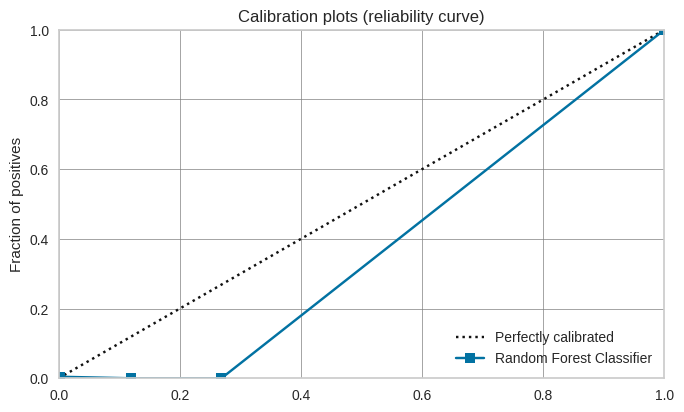

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(rf, plot='calibration')

In [38]:
calibrated_rf = calibrate_model(rf)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.4733     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.5800     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
5       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
6       0.9933  0.5000     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.5403     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.0805     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.0872     0.0    0.0  0.0    0.0  0.0
Mean    0.9960  0.2261     0.0    0.0  0.0    NaN  0.0
Std     0.0033  0.2460     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

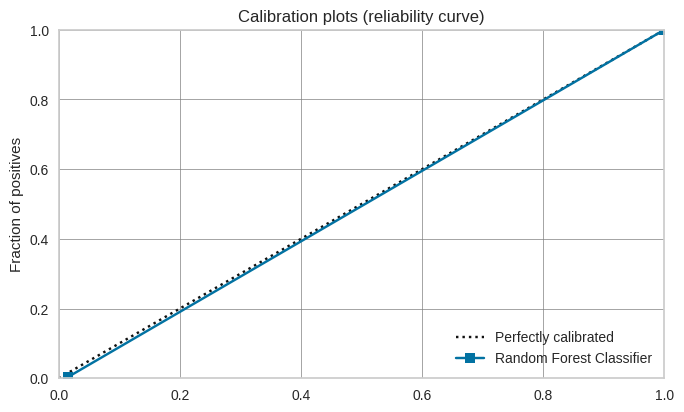

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(calibrated_rf, plot='calibration')

In [41]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9934  0.4400     0.0    0.0  0.0    0.0  0.0
1       0.9934  0.4467     0.0    0.0  0.0    0.0  0.0
2       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
3       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
4       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
5       1.0000  0.0000     0.0    0.0  0.0    NaN  0.0
6       0.9933  0.4698     0.0    0.0  0.0    0.0  0.0
7       0.9933  0.4698     0.0    0.0  0.0    0.0  0.0
8       0.9933  0.5000     0.0    0.0  0.0    0.0  0.0
9       0.9933  0.5000     0.0    0.0  0.0    0.0  0.0
Mean    0.9960  0.2826     0.0    0.0  0.0    NaN  0.0
Std     0.0033  0.2315     0.0    0.0  0.0    NaN  0.0

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

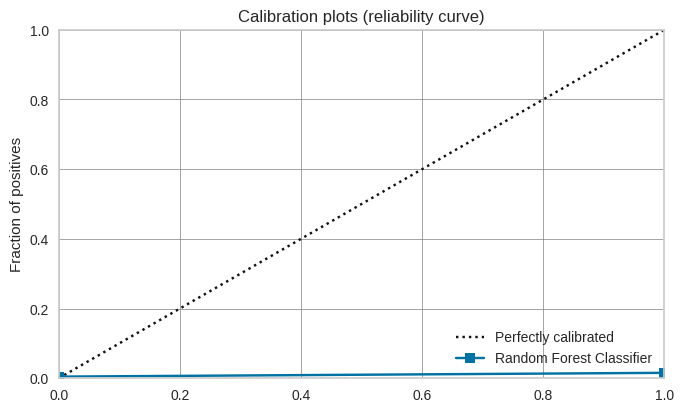

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [43]:
!mlflow ui

[2022-09-09 00:54:49 +0000] [8827] [INFO] Starting gunicorn 20.1.0
[2022-09-09 00:54:49 +0000] [8827] [INFO] Listening at: http://127.0.0.1:5000 (8827)
[2022-09-09 00:54:49 +0000] [8827] [INFO] Using worker: sync
[2022-09-09 00:54:49 +0000] [8830] [INFO] Booting worker with pid: 8830
cdsfsg
[2022-09-09 00:55:11 +0000] [8827] [INFO] Handling signal: int

Aborted!
[2022-09-09 00:55:11 +0000] [8830] [INFO] Worker exiting (pid: 8830)
[2022-09-09 00:55:11 +0000] [8827] [INFO] Shutting down: Master
